In [1]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np
import os

In [2]:
classes_name = ['background', 'kidney', 'tumor']
# classes_name = ['bg', 'dog', 'cat']
cls_map = {name: i for i, name in enumerate(classes_name)}
cls_map

{'background': 0, 'kidney': 1, 'tumor': 2}

In [12]:
# img_path = './cd2.jpg'
# json_path = './cd2.json'
# img_path = './seg1.jpg'
json_path = './seg1.json'

In [4]:
# img = cv2.imread(img_path)[:,:,::-1]
# plt.imshow(img)

In [5]:
data = json.load(open(json_path))

In [6]:
data

{'version': '5.3.0a0',
 'flags': {},
 'shapes': [{'label': 'kidney',
   'points': [[326.08403361344534, 325.6428571428571],
    [288.2689075630252, 333.2058823529412],
    [252.97478991596637, 340.7689075630252],
    [227.76470588235293, 361.7773109243698],
    [215.99999999999997, 381.94537815126046],
    [190.78991596638653, 409.67647058823525],
    [187.4285714285714, 427.32352941176475],
    [195.8319327731092, 439.0882352941177],
    [200.03361344537814, 440.7689075630252],
    [212.63865546218486, 444.1302521008404],
    [226.08403361344534, 436.5672268907563],
    [240.36974789915965, 439.92857142857144],
    [253.81512605042013, 459.25630252100837],
    [259.6974789915966, 475.2226890756302],
    [255.49579831932772, 486.98739495798316],
    [240.36974789915965, 499.59243697478985],
    [234.48739495798316, 507.9957983193277],
    [250.45378151260502, 513.0378151260504],
    [279.0252100840336, 512.1974789915967],
    [311.79831932773106, 496.2310924369748],
    [316.0, 482.785

In [7]:
height = data['imageHeight']
width = data['imageWidth']

height, width

(737, 1032)

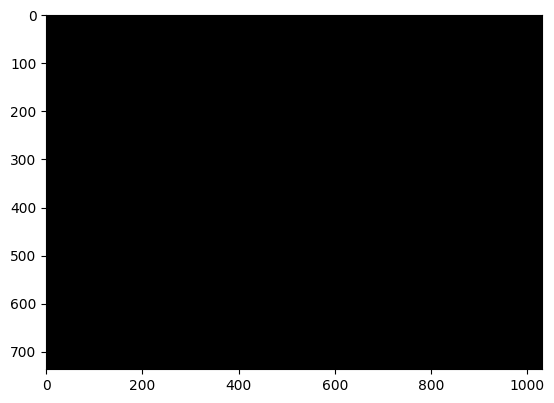

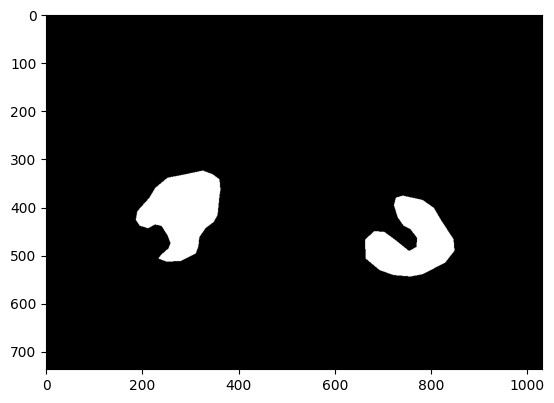

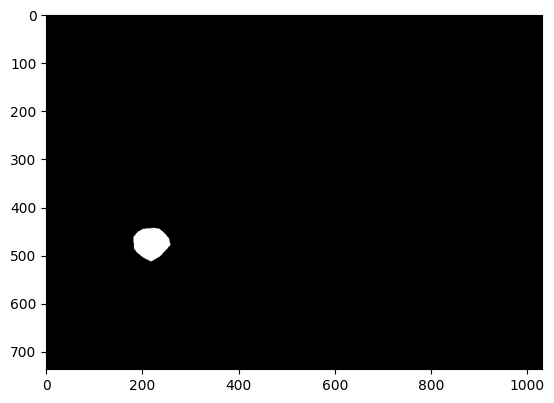

In [8]:
# Draw Object mask
mask = np.zeros((len(classes_name), height, width))

for shape in data['shapes']:
    cls_name = shape['label']
    cls_idx = cls_map[cls_name]
    points = shape['points']
    cv2.fillPoly(mask[cls_idx],
                 np.array([points], dtype=np.int32),
                 255) # fill object with 255

for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [9]:
# update backgroud mask
mask[0] = 255-np.max(mask[1:], axis=0)

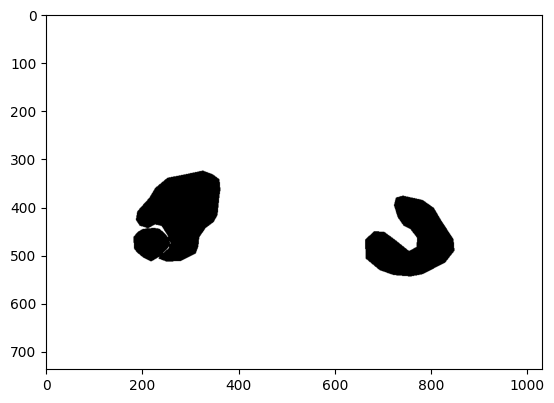

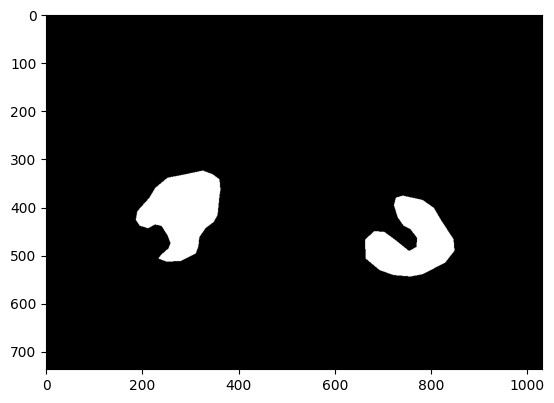

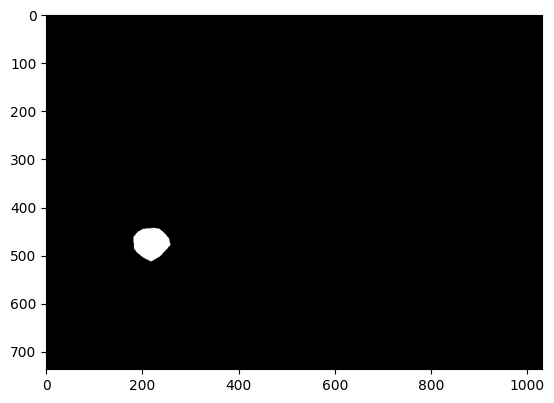

In [10]:
# show all masks
for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [13]:
# Get File name
filename_img = os.path.split(json_path)[-1]
filename = filename_img.split('.')[0]
filename

'seg1'

In [14]:
# Save Mask File
for i, m in enumerate(mask):
    # path_save = os.path.join('/content/drive/My Drive', f'{filename}_mask_{i}.png')
    path_save = os.path.join('.', f'{filename}_mask_{i}.png')
    cv2.imwrite(path_save, m)

#### Single mask

(737, 1032)


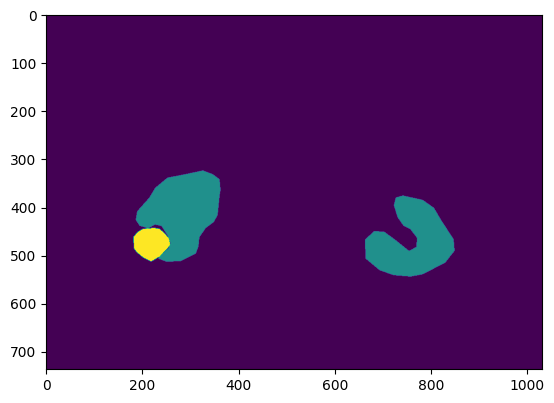

In [15]:
mask_single = np.argmax(mask, axis=0)
print(mask_single.shape)

plt.imshow(mask_single)

In [16]:
cv2.imwrite(f"{filename}.png", mask_single)

True

In [17]:
print(np.unique(mask_single))

[0 1 2]
